In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.gridspec as gridspec
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier # non needed
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from numpy import mean
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, OneHotEncoder
from numpy import std
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
%matplotlib inline
cols = ['Age', 'Work-Class', 'Final-Weight', 'Education', 'Education-Number', 'Marital-Status', 'Occupation',
          'Relationship', 'Race', 'Sex', 'Capital-Gain', 'Capital-Loss', 'Weekly-Hours', 'Country', 'Income']
df = pd.read_csv("datasets/adult.csv",names = cols)     # Read from CSV file
df

,Age,Work-Class,Final-Weight,Education,Education-Number,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Weekly-Hours,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data exploration 

In [3]:
df.info() # Display column's info such as datatype and NANs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work-Class        32561 non-null  object
 2   Final-Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education-Number  32561 non-null  int64 
 5   Marital-Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital-Gain      32561 non-null  int64 
 11  Capital-Loss      32561 non-null  int64 
 12  Weekly-Hours      32561 non-null  int64 
 13  Country           32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Plot all numerical columns

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Final-Weight'}>],
       [<AxesSubplot:title={'center':'Education-Number'}>,
        <AxesSubplot:title={'center':'Capital-Gain'}>],
       [<AxesSubplot:title={'center':'Capital-Loss'}>,
        <AxesSubplot:title={'center':'Weekly-Hours'}>]], dtype=object)

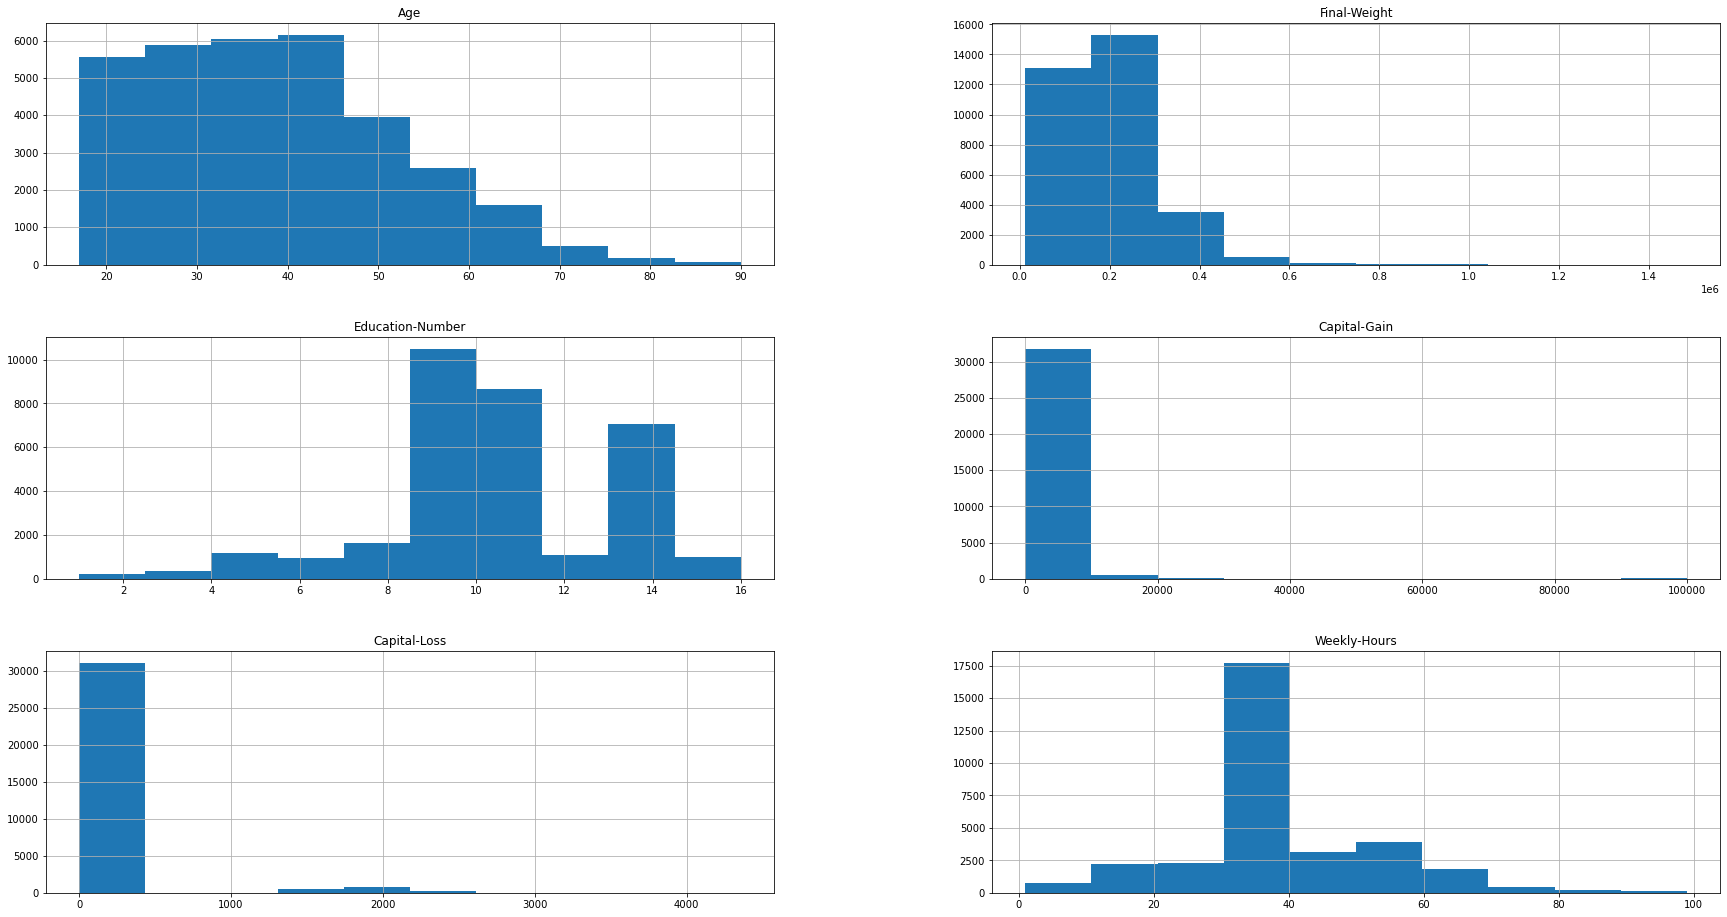

In [4]:
df.hist(figsize = (30,16))

In [5]:
for i in list(df.columns):   # Print all values in all columns
    print(df[i].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Work-Class, dtype: int64
203488    13
123011    13
164190    13
148995    12
113364    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Final-Weight, Length: 21648, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtyp

Age                    AxesSubplot(0.125,0.125;0.110714x0.755)
Final-Weight        AxesSubplot(0.257857,0.125;0.110714x0.755)
Education-Number    AxesSubplot(0.390714,0.125;0.110714x0.755)
Capital-Gain        AxesSubplot(0.523571,0.125;0.110714x0.755)
Capital-Loss        AxesSubplot(0.656429,0.125;0.110714x0.755)
Weekly-Hours        AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

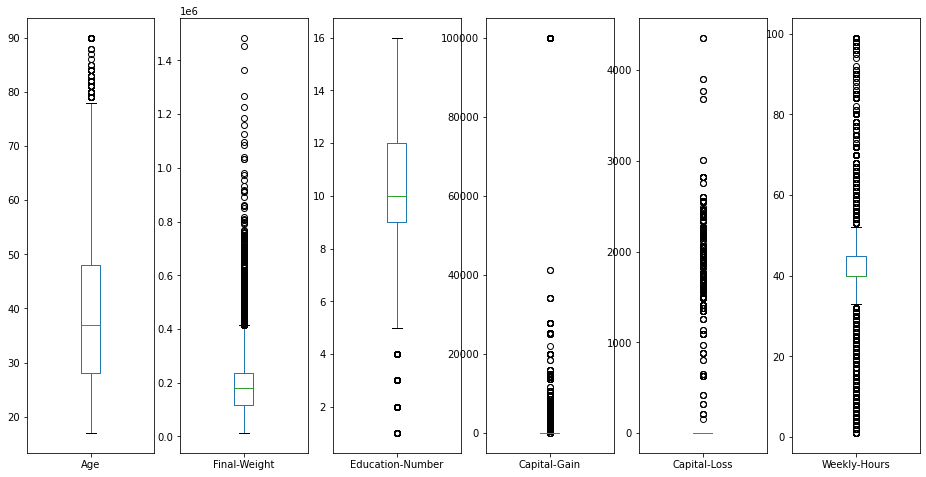

In [6]:
# Check for outliers
df.plot(kind = 'box', figsize = (16,8)  , subplots = True ) 

<AxesSubplot:>

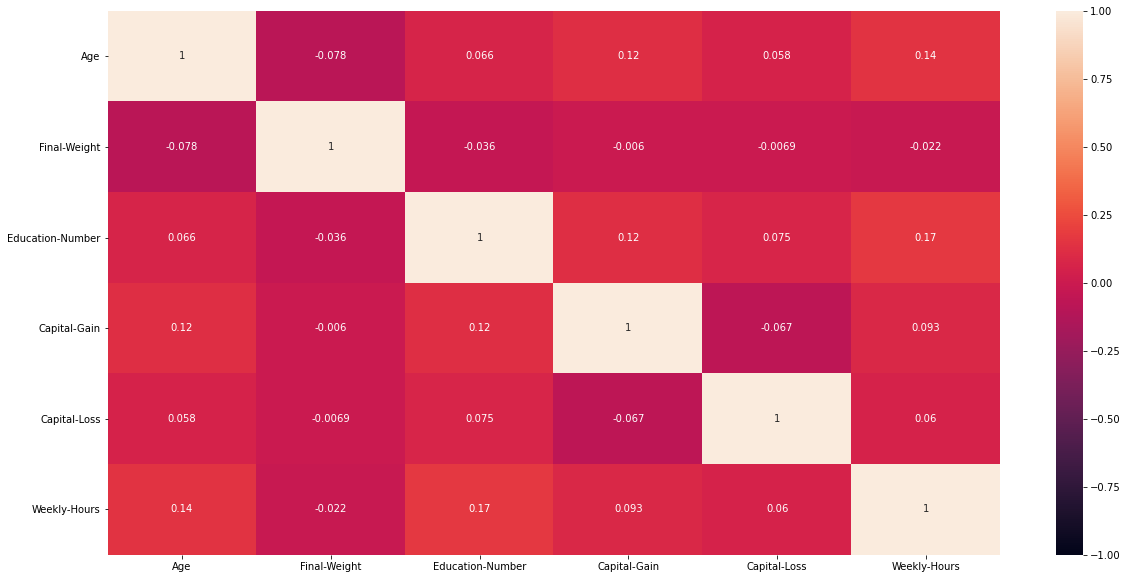

In [7]:
# Show correlation of the features
plt.rcParams['figure.figsize']=(20,10)
sns.heatmap(df.corr(method='spearman'), vmax = 1 , vmin = -1 , annot = True )

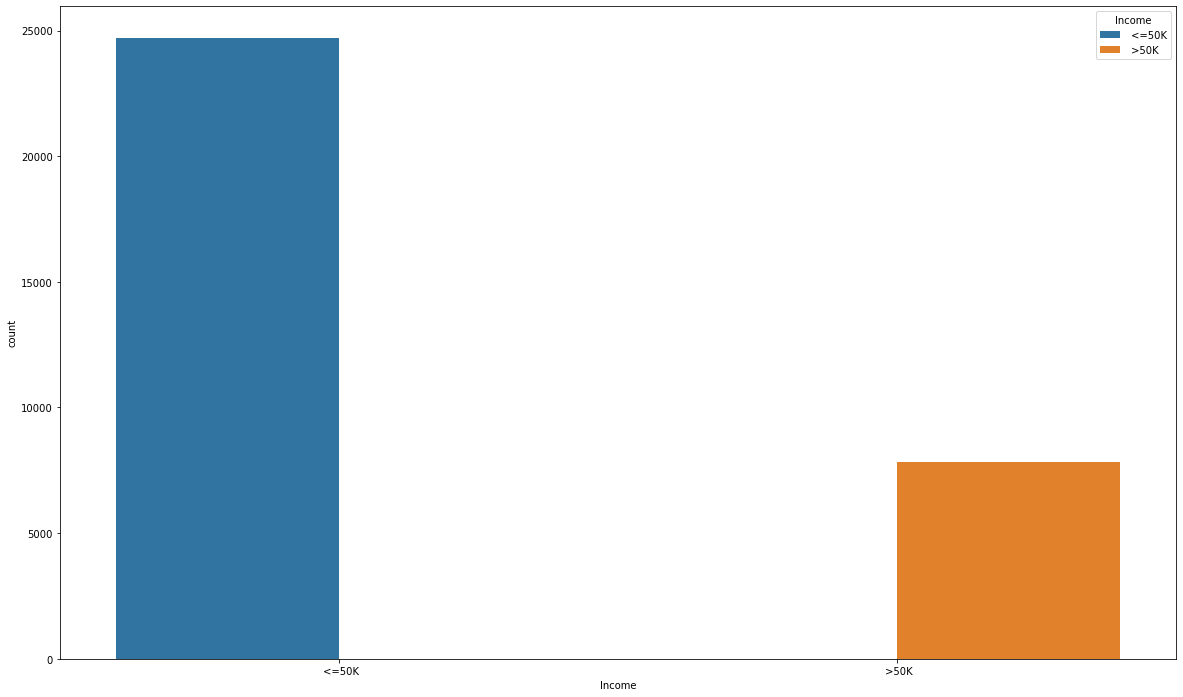

In [8]:
plt.figure(figsize=(20,12)) 
sns.countplot(x = 'Income', hue = 'Income', data = df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

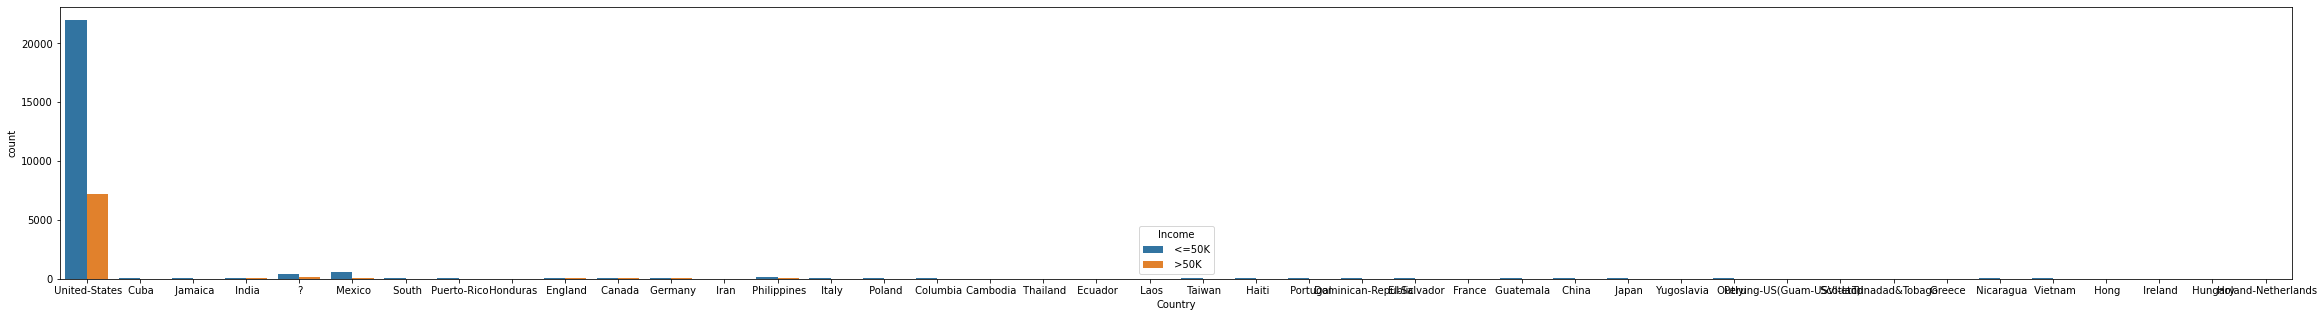

In [9]:
plt.figure(figsize=(40,5)) 
sns.countplot(x = 'Country', hue = 'Income', data = df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

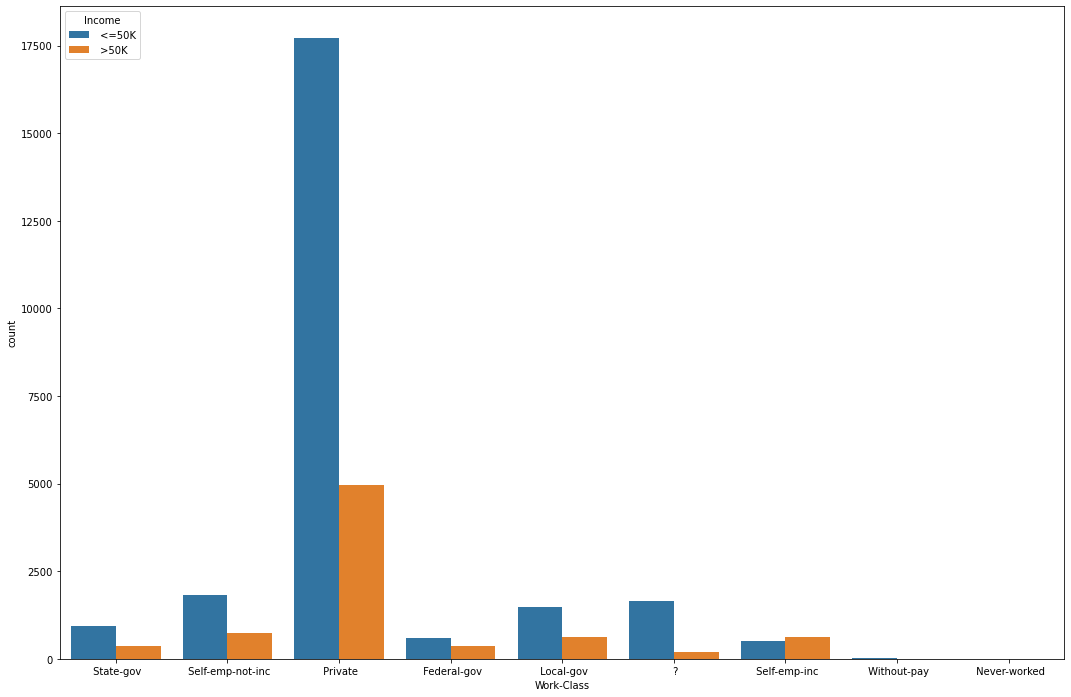

In [10]:
plt.figure(figsize=(18,12)) 
sns.countplot(x = 'Work-Class', hue = 'Income', data = df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

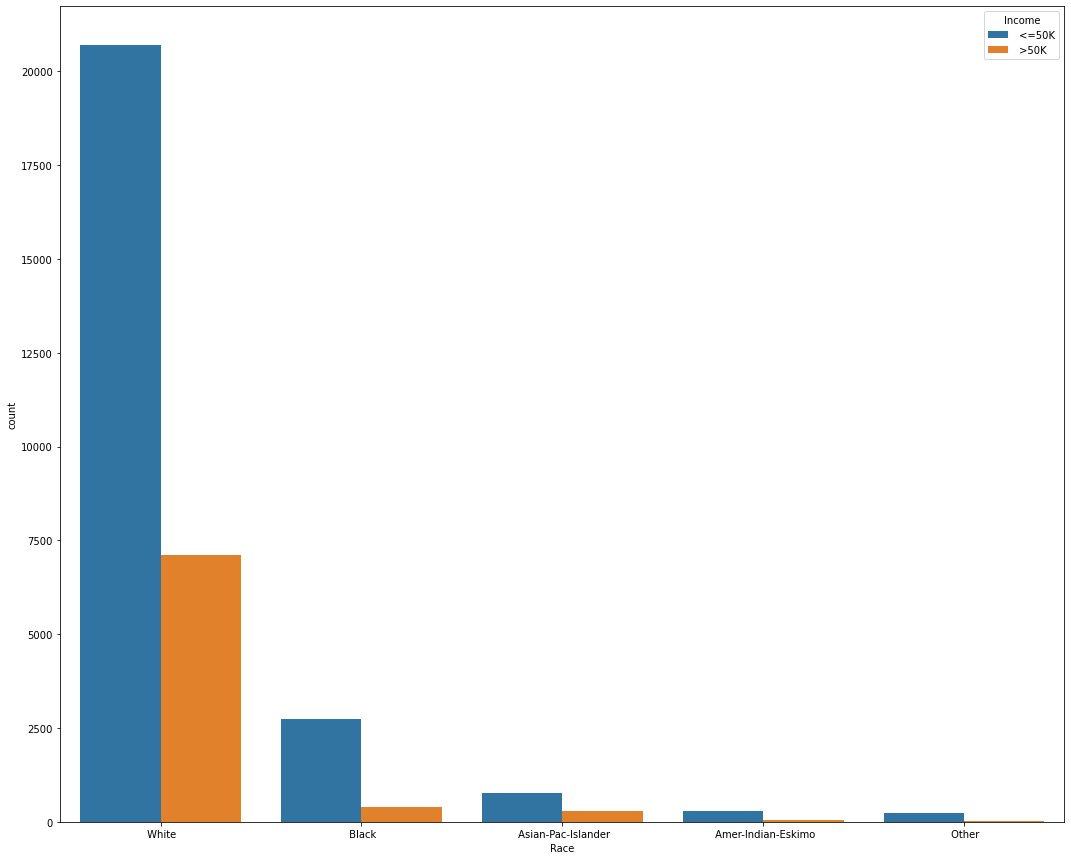

In [11]:
plt.figure(figsize=(18,15)) 
sns.countplot(x = 'Race', hue = 'Income', data = df)
plt.show

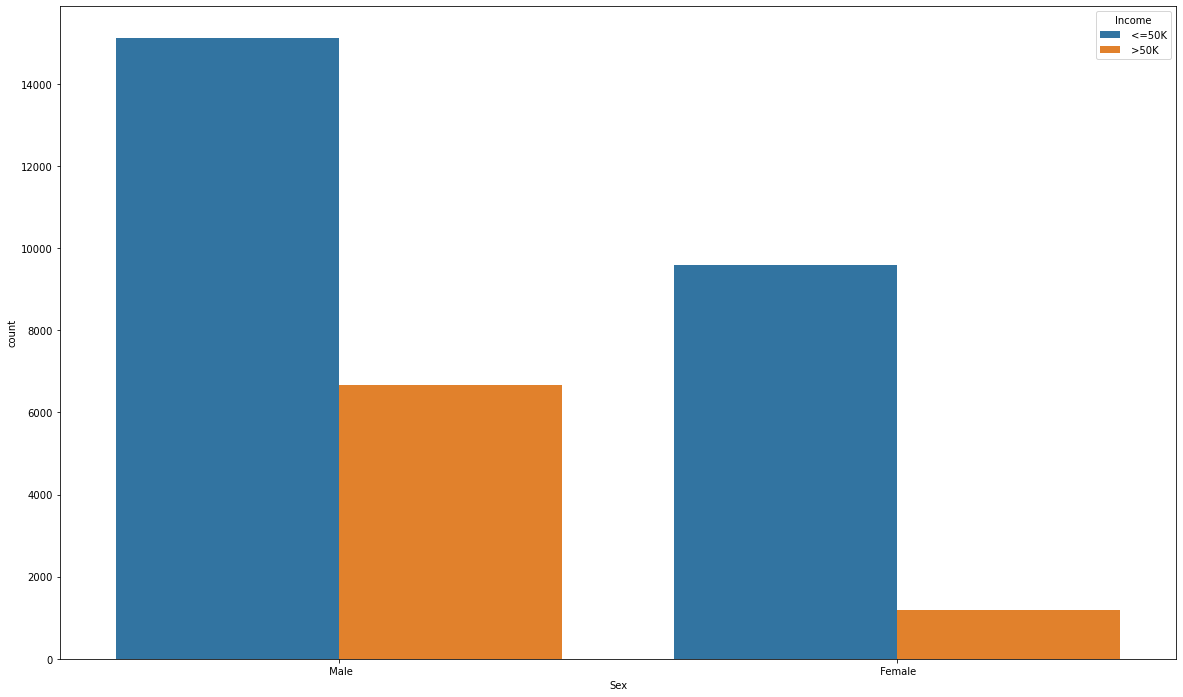

In [12]:
plt.figure(figsize=(20,12)) 
sns.countplot(x = 'Sex', hue = 'Income', data = df)
plt.show()

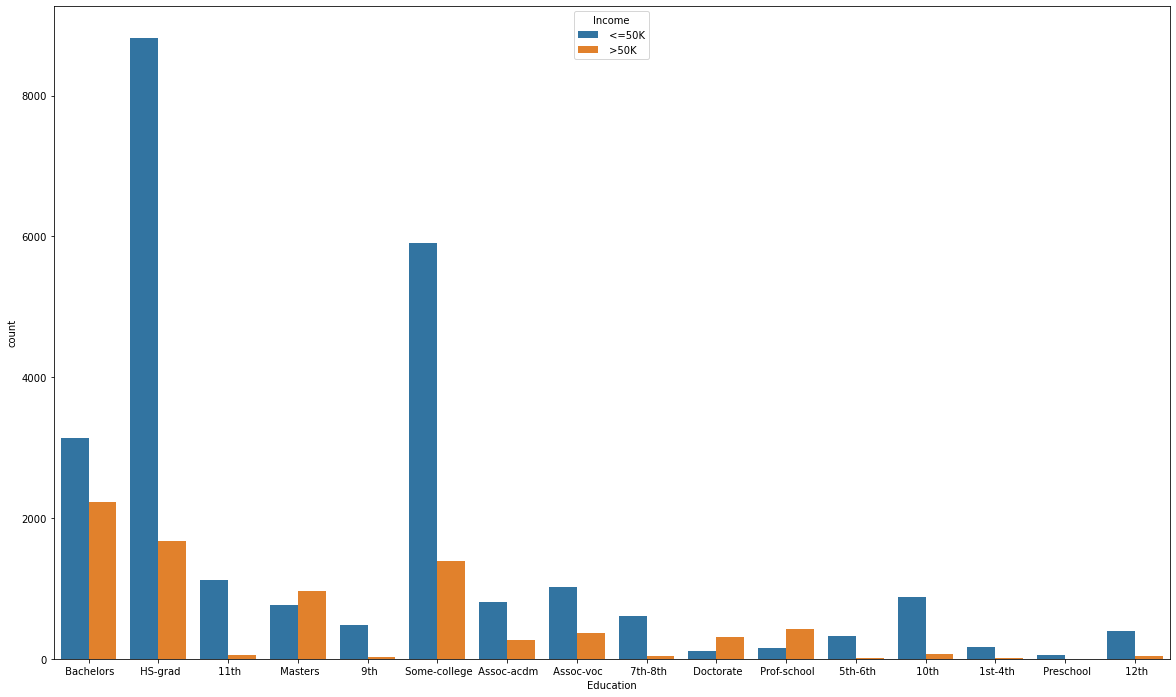

In [13]:
plt.figure(figsize=(20,12)) 
sns.countplot(x = 'Education', hue = 'Income', data = df)
plt.show()

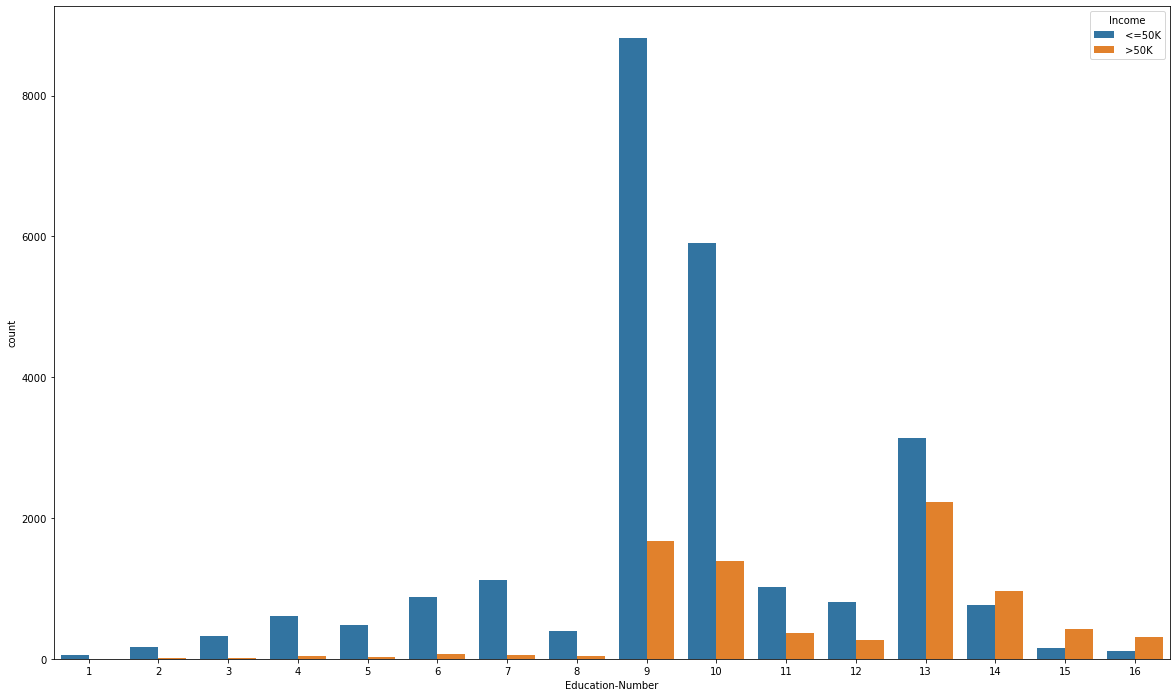

In [14]:
plt.figure(figsize=(20,12)) 
sns.countplot(x = 'Education-Number', hue = 'Income', data = df)
plt.show()

<AxesSubplot:xlabel='Weekly-Hours', ylabel='count'>

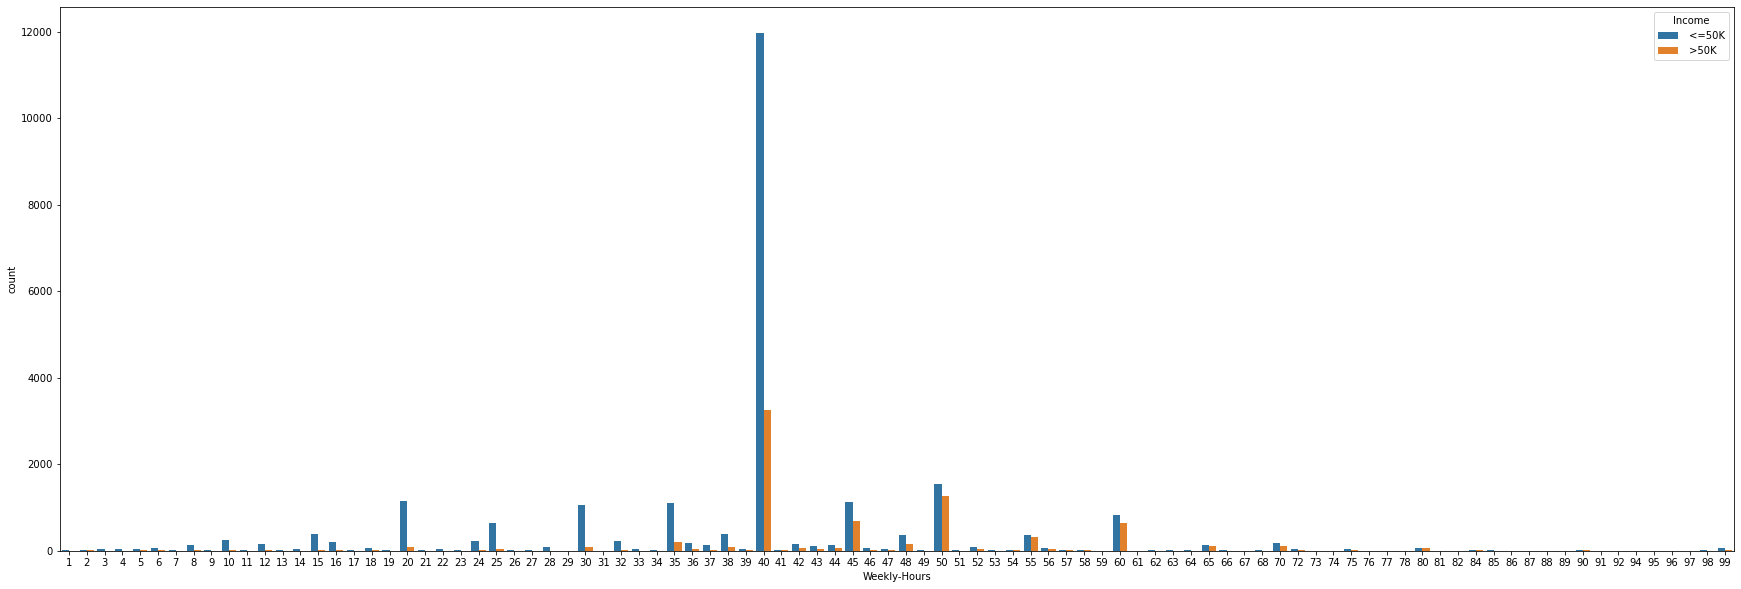

In [15]:
plt.figure(figsize=(30,10)) 
sns.countplot(x = 'Weekly-Hours', hue = 'Income', data = df)

<AxesSubplot:xlabel='Marital-Status', ylabel='count'>

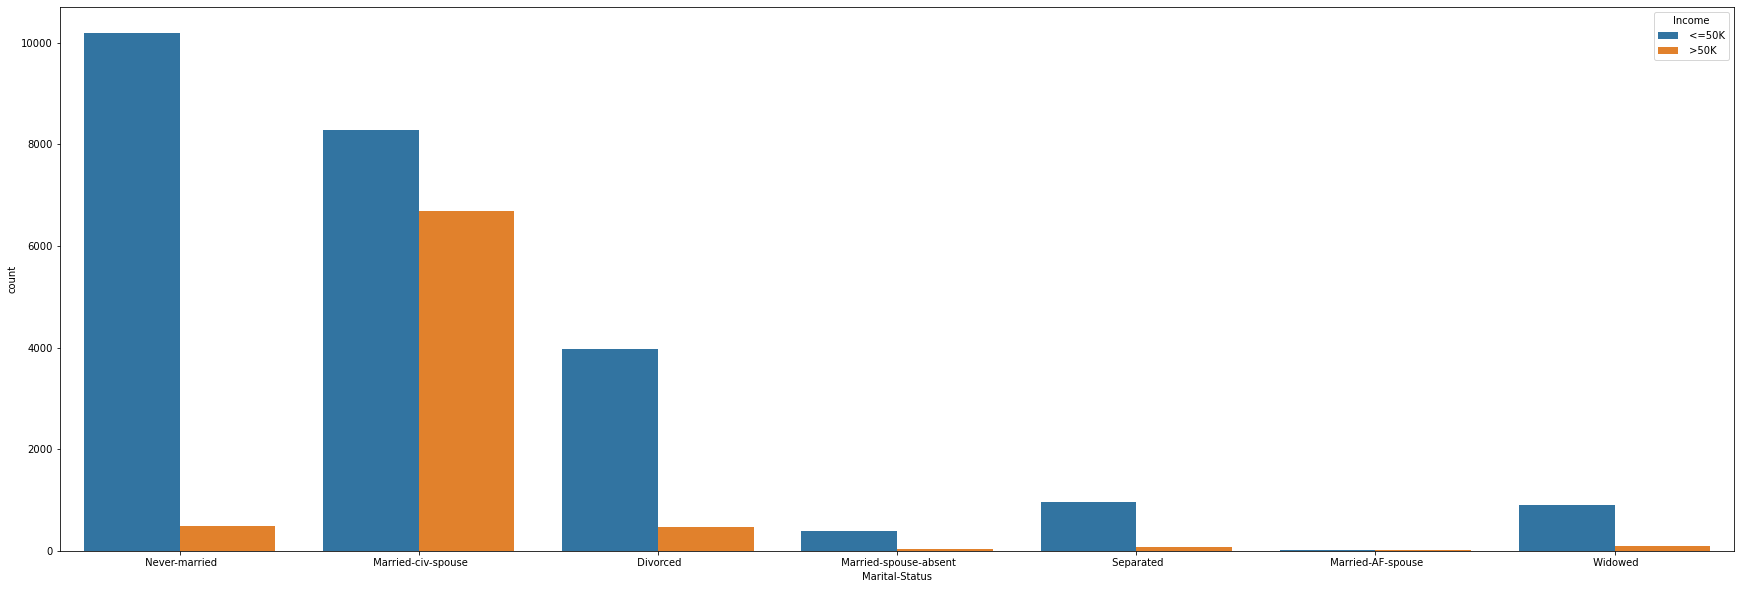

In [16]:
plt.figure(figsize=(30,10)) 
sns.countplot(x = 'Marital-Status', hue = 'Income', data = df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

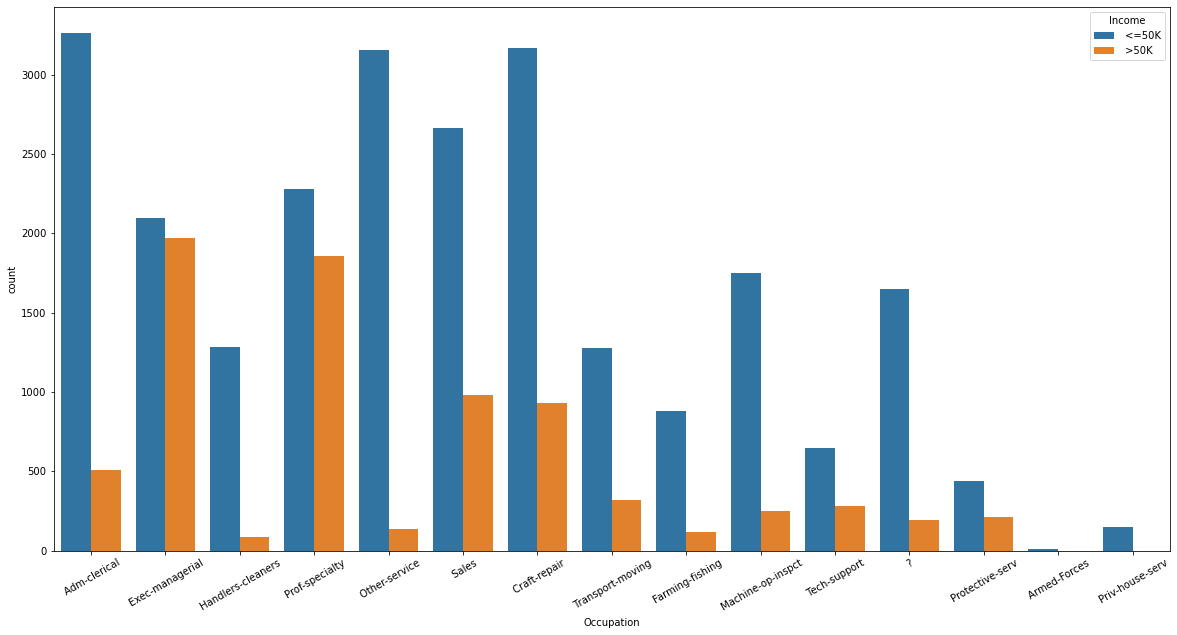

In [17]:
plt.xticks(rotation = 30)
sns.countplot(x = 'Occupation', hue = 'Income', data = df)

Text(0.5, 0, 'Age')

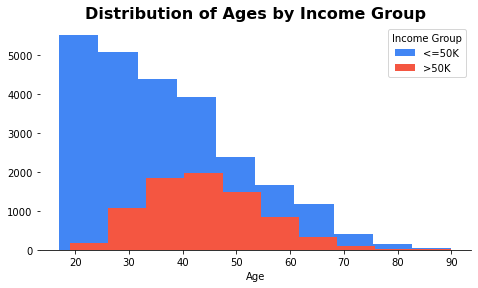

In [18]:
plt.figure(figsize=(17,34))
gs = gridspec.GridSpec(7,2)
ax = plt.subplot(gs[0,0])
ax.hist(df.loc[df['Income']==" <=50K", 'Age'], color="#4286f4")
ax.hist(df.loc[df['Income']==" >50K", 'Age'], color="#f45641")
ax.set_title("Distribution of Ages by Income Group", fontsize=16, fontweight='bold')
ax.legend(['<=50K', '>50K'], title="Income Group")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("Age")

# Pre-processing

In [19]:
E = OneHotEncoder(drop = 'first' , dtype = np.int)

In [20]:
# Encode the "Income" feature to a numerical column
dfn = df[["Income"]]
dfn = E.fit_transform(dfn).toarray()
dfn = pd.DataFrame(dfn,columns=['Encoded-Income'])
df = pd.concat([dfn,df],axis = 1)
df

,Encoded-Income,Age,Work-Class,Final-Weight,Education,Education-Number,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Weekly-Hours,Country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,0,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,0,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,1,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,0,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,0,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [21]:
# Encode the "Sex" feature to a numerical column
dfn = df[["Sex"]]
dfn = E.fit_transform(dfn).toarray()
dfn = pd.DataFrame(dfn,columns=['Encoded-Sex'])
df = pd.concat([dfn,df],axis = 1)
df

,Encoded-Sex,Encoded-Income,Age,Work-Class,Final-Weight,Education,Education-Number,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Weekly-Hours,Country,Income
0,1,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,1,0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,1,0,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,0,0,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,1,1,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,0,0,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,1,0,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [22]:
# Most of the data obtained is about individuals from U.S
# Split country column into America and Others
df = df.drop(df[df['Country'] == ' ?'].index)
Country = np.array(df['Country'].unique())
Country = np.delete(Country, 0)
df['Country'].replace(Country, 'Other', inplace = True)
df

,Encoded-Sex,Encoded-Income,Age,Work-Class,Final-Weight,Education,Education-Number,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Weekly-Hours,Country,Income
0,1,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,1,0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,1,0,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,0,0,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,1,1,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,0,0,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,1,0,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<function matplotlib.pyplot.show(close=None, block=None)>

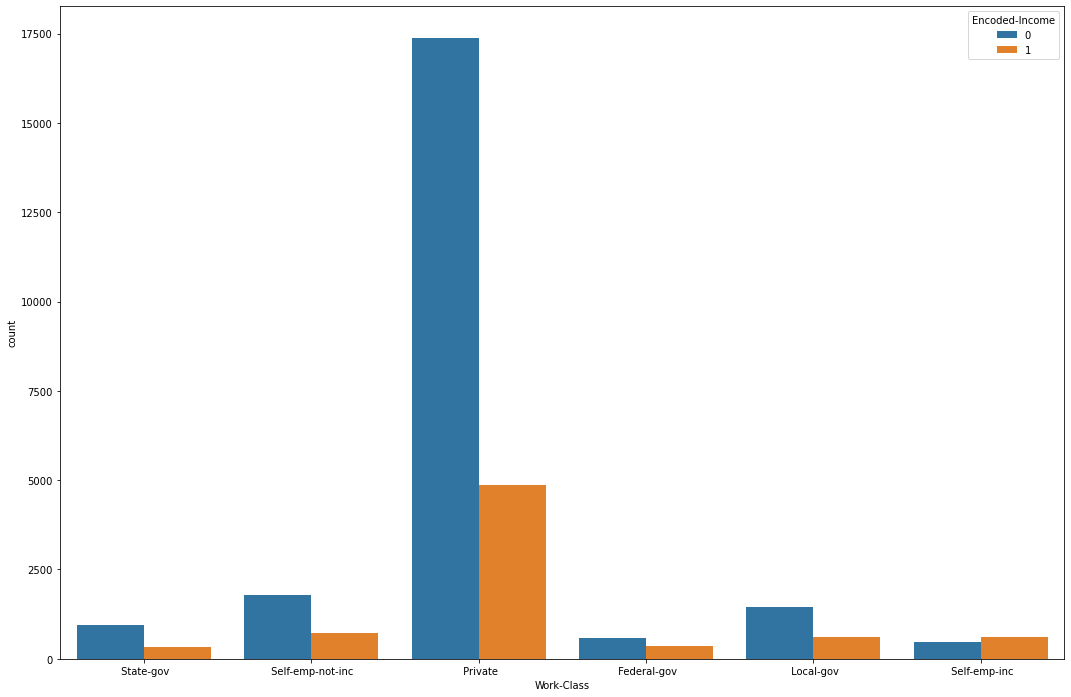

In [52]:
plt.figure(figsize=(18,12)) 
sns.countplot(x = 'Work-Class', hue = 'Encoded-Income', data = df)
plt.show

In [26]:
df.loc[df.duplicated(), :]

,Encoded-Sex,Encoded-Income,Age,Work-Class,Final-Weight,Education,Education-Number,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Weekly-Hours,Country,Income
4881,1,0,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Other,<=50K
5104,1,0,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,0,0,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,0,0,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,0,0,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Other,<=50K
15059,1,0,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Other,<=50K
17040,1,0,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18698,1,0,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,0,0,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
21490,1,0,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K


In [27]:
df.drop_duplicates(subset=None, keep='first', inplace=True)
df.duplicated().sum()

0

In [28]:
df.loc[df.duplicated(), :]

,Encoded-Sex,Encoded-Income,Age,Work-Class,Final-Weight,Education,Education-Number,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Weekly-Hours,Country,Income


In [29]:
workclass_unwanted_values = [' ?' , ' Without-pay' , ' Never-worked']
for i in workclass_unwanted_values:                     # Remove all unwanted data 
    df = df.drop(df[df['Work-Class'] == str(i)].index)

In [30]:
df['Capital-Diff'] = df['Capital-Gain'] - df['Capital-Loss']
df.drop(['Capital-Gain'], axis = 1, inplace = True)
df.drop(['Capital-Loss'], axis = 1, inplace = True)
df

,Encoded-Sex,Encoded-Income,Age,Work-Class,Final-Weight,Education,Education-Number,Marital-Status,Occupation,Relationship,Race,Sex,Weekly-Hours,Country,Income,Capital-Diff
0,1,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,2174
1,1,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0
2,1,0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0
3,1,0,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,0
4,0,0,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Other,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,0
32557,1,1,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,0
32558,0,0,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,0
32559,1,0,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,0


In [31]:
df['Work-Class'].value_counts()

 Private             22264
 Self-emp-not-inc     2498
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
Name: Work-Class, dtype: int64

In [32]:
df['Race'].unique()
df['Race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)
df

,Encoded-Sex,Encoded-Income,Age,Work-Class,Final-Weight,Education,Education-Number,Marital-Status,Occupation,Relationship,Race,Sex,Weekly-Hours,Country,Income,Capital-Diff
0,1,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,2174
1,1,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0
2,1,0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0
3,1,0,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,40,United-States,<=50K,0
4,0,0,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Other,Female,40,Other,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,0
32557,1,1,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,0
32558,0,0,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,0
32559,1,0,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,0


In [33]:
education_cat = df['Education'].unique()
print("Education : Education-Num")
for i in education_cat:
   # print("Education : Education-Num")
    print(" {} : {}"                      # Show the relationship between edcuation and education-number
          .format(i, df[df['Education'] == i]['Education-Number'].unique()))

Education : Education-Num
  Bachelors : [13]
  HS-grad : [9]
  11th : [7]
  Masters : [14]
  9th : [5]
  Some-college : [10]
  Assoc-acdm : [12]
  7th-8th : [4]
  Doctorate : [16]
  Assoc-voc : [11]
  Prof-school : [15]
  5th-6th : [3]
  10th : [6]
  Preschool : [1]
  12th : [8]
  1st-4th : [2]


In [34]:
dfn = df[['Work-Class','Marital-Status','Occupation','Relationship','Race','Country']]
dfn = E.fit_transform(dfn).toarray()
dfn = pd.DataFrame(dfn)
dfn.head()
df

,Encoded-Sex,Encoded-Income,Age,Work-Class,Final-Weight,Education,Education-Number,Marital-Status,Occupation,Relationship,Race,Sex,Weekly-Hours,Country,Income,Capital-Diff
0,1,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,2174
1,1,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0
2,1,0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0
3,1,0,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,40,United-States,<=50K,0
4,0,0,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Other,Female,40,Other,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,0
32557,1,1,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,0
32558,0,0,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,0
32559,1,0,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,0


In [35]:
df = pd.concat([df.reset_index(drop=True),dfn.reset_index(drop=True)], axis=1)
df

,Encoded-Sex,Encoded-Income,Age,Work-Class,Final-Weight,Education,Education-Number,Marital-Status,Occupation,Relationship,...,21,22,23,24,25,26,27,28,29,30
0,1,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,...,0,0,0,1,0,0,0,0,1,0
1,1,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,...,0,0,0,0,0,0,0,0,1,0
2,1,0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,...,0,0,0,1,0,0,0,0,1,0
3,1,0,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,...,0,0,0,0,0,0,0,0,0,0
4,0,0,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30120,0,0,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,...,0,1,0,0,0,0,0,1,1,0
30121,1,1,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,...,0,0,0,0,0,0,0,0,1,0
30122,0,0,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,...,0,0,0,0,0,0,1,0,1,0
30123,1,0,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,...,0,0,0,0,0,1,0,0,1,0


In [36]:
# There is no correlation between Income and Final Weight
# Drop the final weight column
df.drop(['Final-Weight',"Education",'Income', 'Sex'], axis = 1, inplace = True)


# Splitting the dataset

In [37]:
# Recode categorical features
X = df.drop(['Encoded-Income'], axis = 1)
X = pd.get_dummies(X)
y = df['Encoded-Income']
X
y

0        0
1        0
2        0
3        0
4        0
        ..
30120    0
30121    1
30122    0
30123    0
30124    1
Name: Encoded-Income, Length: 30125, dtype: int32

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [39]:
def score(algorithm, X_train, X_test):
    '''
    This function fits the training set and then it prints
    it's accuracy
 * @param {string} algorithm the selected algorithm
 * @param {string} X_train the training set for the features
 * @param {string} X_test the testing set for the features
 '''
    model =  algorithm
    model.fit(X_train,Y_train)
    score = model.score( X_train, Y_train)
    print("Training Score: {:.3f}".format(score))
    score = model.score(X_test, Y_test)
    print("Testing Score : {:.3f}".format(score))
    return


In [40]:
score(KNeighborsClassifier(n_neighbors=2), X_train, X_test)

Training Score: 0.909
Testing Score : 0.837


# Scaling

In [41]:
def scalar(algorithm, X_train, X_test):
    '''
     This function scales a testing set using a specified scalar
     * @param {string} algorithm the selected algorithm
     * @param {string} X_train the training set for the features
     * @param {string} X_test the testing set for the features
     '''
    scalar_types = [MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()]
    for scalar_type in scalar_types:
        sc= scalar_type
        sc.fit(X_train)
        X_train_scaled =sc.fit_transform(X_train) 
        X_test_scaled =sc.transform(X_test)
        print('Scaled Results ',scalar_type , ' scaling method:')
        score(algorithm(), X_train_scaled, X_test_scaled)
    return

In [42]:
scalar(KNeighborsClassifier, X_train, X_test)

Scaled Results  MinMaxScaler()  scaling method:
Training Score: 0.872
Testing Score : 0.820
Scaled Results  StandardScaler()  scaling method:
Training Score: 0.874
Testing Score : 0.827
Scaled Results  RobustScaler()  scaling method:
Training Score: 0.897
Testing Score : 0.850
Scaled Results  Normalizer()  scaling method:
Training Score: 0.875
Testing Score : 0.817


In [43]:
scalar(LogisticRegression, X_train, X_test)

Scaled Results  MinMaxScaler()  scaling method:
Training Score: 0.843
Testing Score : 0.839
Scaled Results  StandardScaler()  scaling method:
Training Score: 0.844
Testing Score : 0.839
Scaled Results  RobustScaler()  scaling method:
Training Score: 0.843
Testing Score : 0.838
Scaled Results  Normalizer()  scaling method:
Training Score: 0.783
Testing Score : 0.777


# Random & Grid search 

In [44]:
def Search(Algorithm, model):
    '''
     apply random or grid search using 
     either logistic regression or KNN
     * @param {string} algorithm the selected algorithm
     * @param {string} model the selected model
    '''
    if model == LogisticRegression:
        para_grid = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
        gridModelAcc = Algorithm(LogisticRegression(), para_grid,scoring = 'recall')
        gridModelAcc.fit(X_train, Y_train)
        YPredAcc = gridModelAcc.predict(X_test)
    elif model == KNeighborsClassifier:
        k_list =list(range(1,30)) #values we wanna search through from neighbours
        weight_list =['uniform','distance']  
        para_grid =dict(n_neighbors=k_list,weights=weight_list) #dictionary storing hyperparameters
        gridModelAcc=Algorithm(KNeighborsClassifier(),para_grid,cv=5,scoring="accuracy",return_train_score=False)  
        gridModelAcc.fit(X_train,Y_train)
        YPredAcc = gridModelAcc.predict(X_test)
    else:
        return(print("Model Used is an invalid parameter"))
    print('Optimal hyperparameter values : ',  gridModelAcc.best_params_)
    cfm = confusion_matrix(Y_test,YPredAcc)
    labels = ["True Negative", "False Positive", "False Negative", "True Positive"] 
    labels_counts = ['{0:0.0f}'.format(value) for value in cfm.flatten()] 
    labels_percentages = ['{:.2%}'.format(value) for value in cfm.flatten()/np.sum(cfm)] 
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(labels,labels_counts,labels_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cfm, annot=labels , fmt='', cmap='Blues')
    return pd.DataFrame({'Accuracy Score' : str(accuracy_score(Y_test,YPredAcc)),
                        'Precision Score ' : str(precision_score(Y_test,YPredAcc)), 
                        'Recall Score' : str(recall_score(Y_test,YPredAcc)),
                        'F1 Score' : str(f1_score(Y_test,YPredAcc)),
                        'ROC AUC Score' : str(mean(roc_auc_score(Y_test,YPredAcc))),
                        'Best Score ' : gridModelAcc.best_score_}, index = [Algorithm])
                        

Optimal hyperparameter values :  {'n_neighbors': 12, 'weights': 'uniform'}


,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC AUC Score,Best Score
<class 'sklearn.model_selection._search.GridSearchCV'>,0.8530270844397239,0.7676567656765677,0.6063607924921793,0.6775415088843577,0.771830200307365,0.852034


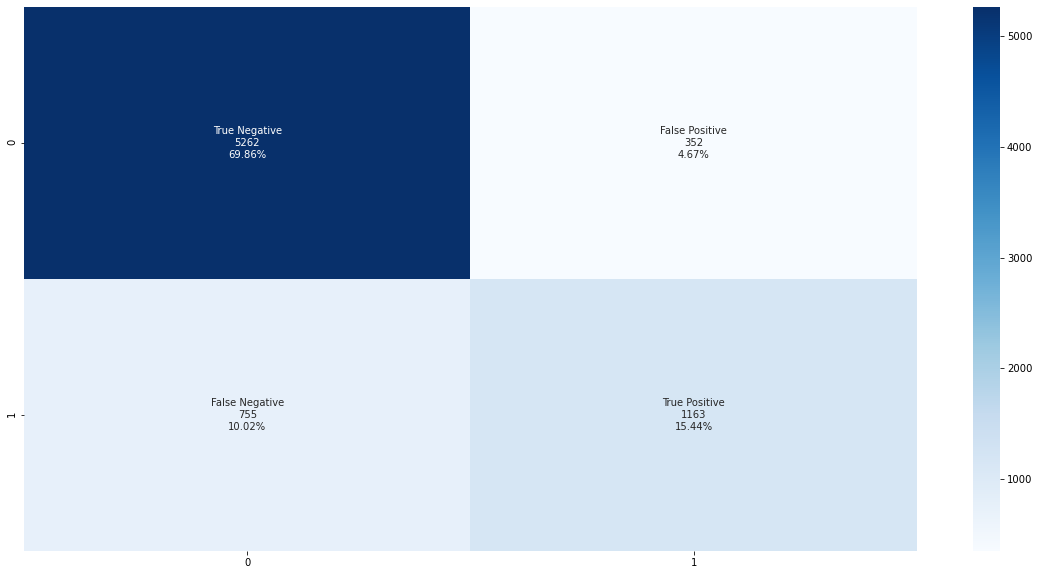

In [45]:
Search(GridSearchCV, KNeighborsClassifier)

Optimal hyperparameter values :  {'penalty': 'l2', 'C': 10}


,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC AUC Score,Best Score
<class 'sklearn.model_selection._search.RandomizedSearchCV'>,0.830987785448752,0.7055449330783938,0.5771637122002086,0.6349297390306853,0.7474347239305282,0.566929


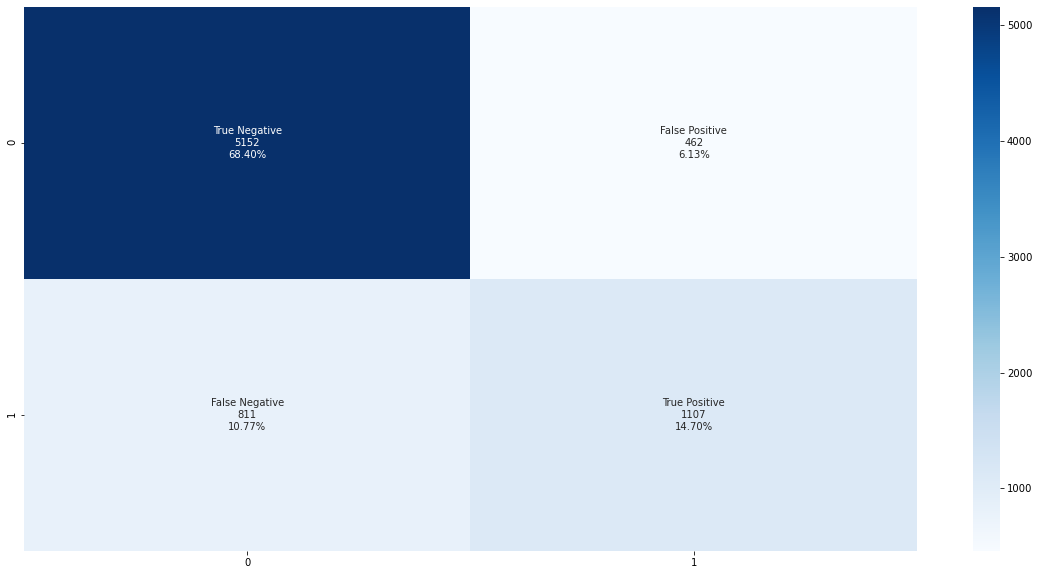

In [46]:
Search(RandomizedSearchCV, LogisticRegression)

In [47]:
model = LogisticRegression( max_iter=5000)
model.fit(X_train,Y_train)


LogisticRegression(max_iter=5000)

In [48]:
score = model.score(X_train, Y_train)
print("Training Score: {:.3f}".format(score))
score = model.score(X_test, Y_test)
print("Testing Score : {:.3f}".format(score))

Training Score: 0.845
Testing Score : 0.838


In [49]:
pd.DataFrame(cross_validate(KNeighborsClassifier(), X,y,cv=4, scoring= {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'} , return_train_score = True, n_jobs=-1))

,fit_time,score_time,test_precision,train_precision,test_accuracy,train_accuracy,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
0,0.060838,15.058159,0.691874,0.801026,0.841078,0.891072,0.653170,0.748801,0.671965,0.774034,0.875244,0.951799
1,0.061835,15.499978,0.691874,0.800619,0.841190,0.888422,0.653518,0.735346,0.672149,0.766596,0.874032,0.950379
2,0.061835,15.495988,0.711316,0.796935,0.848095,0.888023,0.656716,0.738899,0.682927,0.766820,0.880831,0.950143
3,0.060838,15.470056,0.700956,0.804954,0.845704,0.890369,0.664358,0.739030,0.682166,0.770584,0.881055,0.950500


In [50]:
pd.DataFrame(cross_validate(LogisticRegression(), X,y,cv=4, scoring= {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'} , return_train_score = True, n_jobs=-1))

,fit_time,score_time,test_precision,train_precision,test_accuracy,train_accuracy,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
0,0.821275,0.038511,0.699789,0.706781,0.826075,0.827513,0.529036,0.525848,0.602549,0.603036,0.868306,0.871429
1,0.855716,0.042879,0.710196,0.699596,0.830833,0.829512,0.542111,0.553464,0.614873,0.618009,0.869467,0.875808
2,0.847653,0.031912,0.703857,0.702166,0.829505,0.830132,0.544776,0.552753,0.614183,0.618565,0.874686,0.872015
3,0.886828,0.038696,0.723992,0.729054,0.834816,0.833628,0.545019,0.528691,0.621884,0.612913,0.887696,0.882551
